## 4.1 Concept of One-hot encoding

In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [2]:
len(y)

10

In [3]:
len(t)

10

In [4]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [9]:
import numpy as np

In [10]:
t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [11]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

In [12]:
len(t)

10

In [13]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [14]:
t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [15]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 4.2 Minibatch method

In [23]:
import pickle

def get_data(normalize=True, one_hot_label=True, flatten=True):
    with open("../resource/dataset/mnist.pkl", 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)
    (x_train, t_train), (x_test, t_test)  = (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])
    return (x_train, t_train), (x_test, t_test)

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T

In [25]:
(x_train, t_train), (x_test, t_test) = get_data()

In [28]:
train_size = x_train.shape[0]
train_size

60000

In [29]:
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [33]:
np.random.choice(60000, 10)

array([22873, 13614, 53003, 38039, 28410,  3818, 54911, 34945, 29608,
       34542])

In [35]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

## 4.3 Differential

In [3]:
# 나쁜 구현

def numerical_diff(f, x):
    h = 10e-50 #한 없이 작은 수
    return (f(x + h) - f(x)) / h

In [22]:
def numerical_diff(f, x):
    h = 10e-4 #한 없이 작은 수
    return (f(x + h) - f(x - h)) / 2*h

In [16]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

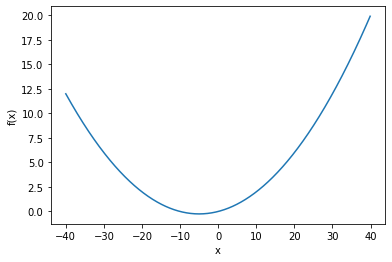

In [17]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-40.0, 40.0, 0.1) #0에서 20까지 0.1 간격으로 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [23]:
numerical_diff(function_1, 1)

1.1999999999999512e-07

In [24]:
numerical_diff(function_1, 5)

2.00000000000089e-07

In [25]:
numerical_diff(function_1, 10)

2.9999999999996695e-07

## 4.4 Partial derivative

In [26]:
def function_2(x):
    return x[0] ** 2 + x[1]**2
    # 또는 return np.sum(x**2)

In [27]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [28]:
numerical_diff(function_tmp1, 3.0)

5.999999999998451e-06

In [29]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [30]:
numerical_diff(function_tmp2, 4.0)

8.000000000000896e-06

## 4.5 Gradient

In [33]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

In [34]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [36]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [37]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

## 4.6 Gradient descent

In [38]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [39]:
def function_2(x):
    return x[0] **2 + x[1]**2

In [40]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])